In [1]:
import os

class transform_2354(object):
    def __init__(self):
        self.x_cols = y23.columns.tolist()
        self.y_cols = y54.columns.tolist()
        self.W = W
    
    def __call__(self,x):
        res = x.values@self.W
        return pd.DataFrame(res,columns=self.y_cols)

class transformer_5433(object):
    def __init__(self,x_col,y_col,W):
        self.x_col = x_col
        self.y_col = y_col
        self.W = W
    
    def __call__(self,X):
        return pd.DataFrame(X.values @ self.W,columns=self.y_col)

In [2]:
import joblib
col_names = joblib.load('../data/phase_2/cleaned/col_names.pkl')
col_names.keys()
TR2354 = joblib.load('../model/transformer(23_to_54).pkl')
TR5433 = joblib.load('../model/transformer(54_to_33).pkl')

In [3]:
os.listdir('../data/phase_2/raw/other')

['200mb201701r2.csv',
 '200mb201909.csv',
 'Aroma-1 Unit 000 Split_Factor Calculation.xlsx',
 'dcs data.xlsx',
 'dcs datar1.xlsx',
 'FCFC Import Naphtha Composition Lab_001~100_R2.xlsx',
 'lims data.xlsx',
 '說明.txt',
 '附件一.xlsx',
 '附件二.xlsx',
 '預餾案dashboard草圖.pdf']

In [4]:
os.listdir('../data/phase_2/cleaned')

['col_names.pkl', 'train(energy).csv', 'train.csv', '現場數據.csv']

In [5]:
os.listdir('../model')

['ANN(58_to_sp162(二合一)).pkl',
 'ANN(58_to_sp162).pkl',
 'ANN(58_to_y162(二合一)).pkl',
 'ANN(58_to_y162).pkl',
 'ANN(energy).pkl',
 'ANN(tray).pkl',
 'eva.pkl',
 'OperationOptimModel.pkl',
 'SVR(4_to_23).pkl',
 'transformer(23_to_54).pkl',
 'transformer(33_to_15).pkl',
 'transformer(43_to_33).pkl',
 'transformer(54_to_23).pkl',
 'transformer(54_to_33).pkl',
 'transformer(SP162_to_Y162).pkl']

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
train = pd.read_csv('../data/phase_2/cleaned/train.csv',index_col=0)

# 真實操作

In [7]:
dcs = pd.read_excel('../data/phase_2/raw/other/dcs datar1.xlsx',index_col=1).iloc[:,1:]
dcs.head()

,回流量,進料量,進料量.1,Unnamed: 5,E053 AFC,E053 AFC.1,LE m3/hr,LE T/hr,HE m3/hr,Feed Rate to C013 (Input),Heart Cut Prod. Rate (Input),Unnamed: 13,Unnamed: 14,Operating Pressure,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Column Temp Profile,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,F001 FG,Unnamed: 34,Unnamed: 35
NaT,Reflux Rate,Naphtha Feed Rate,Naphtha Feed Rate,Naphtha Feed Rate,NaN,NaN,Light End Prod. Rate,NaN,Heavy End Prod. Rate,Feed Rate to C013 (Input),Heart Cut Prod. Rate (Input),Naphtha Temp after E062,Naphtha Feed Rate to C011,V012,C011 Ovhd,C011 Btm,C013 Ovhd,C013 Btm,V012 Operating Temp,C011 Ovhd Temp,C011 Tray 5,C011 Tray 15,C011 Tray 24,C011 Btm Temp,C013 Ovhd Temp,C013 Tray 5 Temp,C013 Tray 12 Temp,C013 Tray 16 Temp,C013 Tray 31 Temp,C013 Tray Btm Temp,E062 3.5K Steam Rate,NaN,NaN,Reboiler Heat Duty
NaT,ARO1-DCS-FIC01101,ARO1-DCS-FIC05101,ARO1-DCS-FIC05103,NaN,ARO1-DCS-TI05301,ARO1-DCS-TIC05302,ARO1-DCS-FIC05501,ARO1-DCS-FI05502,ARO1-DCS-FI06001,ARO1-DCS-FIC06203,ARO1-DCS-FIC05801,ARO1-DCS-TIC06202,ARO1-DCS-FIC06202,ARO1-DCS-PIC01202,ARO1-DCS-PIC01101,ARO1-DCS-PI01102,ARO1-DCS-PI01304,ARO1-DCS-PI01302,ARO1-DCS-TI05301,ARO1-DCS-TI01101,ARO1-DCS-TIC01103A,ARO1-DCS-TI01102,ARO1-DCS-TI01106,ARO1-DCS-TI01104,ARO1-DCS-TI01301,ARO1-DCS-TI01302,ARO1-DCS-TI01305,ARO1-DCS-TIC01307,ARO1-DCS-TI01306,ARO1-DCS-TI01304,ARO1-DCS-FIC06201,ARO1-DCS-FIC00109,NaN,NaN
2019-07-01 00:00:00,62.0124,71.1688,51.5246,122.693,46.9535,53.6895,14.0599,9.31188,12.2163,17.461,96.04,142.167,104.589,0.613857,0.69383,0.900018,0.923197,0.947409,46.9535,84.2077,119.955,91.9682,0,135.493,140.962,150.04,157.909,159.038,169.114,183.129,3.7549,520.2,12132.266602,5.93254
2019-07-01 00:10:00,61.2624,71.3096,51.5685,122.878,47.3879,54.3065,14.1727,9.4736,11.8074,17.6276,96.7905,142.157,103.923,0.613779,0.694065,0.900179,0.923437,0.947304,47.3879,84.2376,120.045,92.0999,0,135.505,141.07,150.173,157.901,159.022,169.114,183.129,3.75447,516.305,12132.149414,5.88805
2019-07-01 00:20:00,61.8176,70.5308,51.5067,122.038,46.5244,53.5042,14.655,9.71855,11.8049,17.8386,96.1433,142.117,104.044,0.613701,0.6943,0.90034,0.923676,0.947199,46.5244,84.2674,120.134,92.2316,0,135.516,141.12,150.259,157.893,159.004,169.114,183.097,3.75404,520.294,12132.032227,5.93348


In [8]:
dcs[['回流量','Unnamed: 5','LE m3/hr','HE m3/hr','Unnamed: 22','Unnamed: 29','Unnamed: 35',
           'Feed Rate to C013 (Input)','Heart Cut Prod. Rate (Input)']]

,回流量,Unnamed: 5,LE m3/hr,HE m3/hr,Unnamed: 22,Unnamed: 29,Unnamed: 35,Feed Rate to C013 (Input),Heart Cut Prod. Rate (Input)
NaT,Reflux Rate,Naphtha Feed Rate,Light End Prod. Rate,Heavy End Prod. Rate,C011 Tray 5,C013 Tray 16 Temp,Reboiler Heat Duty,Feed Rate to C013 (Input),Heart Cut Prod. Rate (Input)
NaT,ARO1-DCS-FIC01101,NaN,ARO1-DCS-FIC05501,ARO1-DCS-FI06001,ARO1-DCS-TIC01103A,ARO1-DCS-TIC01307,NaN,ARO1-DCS-FIC06203,ARO1-DCS-FIC05801
2019-07-01 00:00:00,62.0124,122.693,14.0599,12.2163,119.955,159.038,5.93254,17.461,96.04
2019-07-01 00:10:00,61.2624,122.878,14.1727,11.8074,120.045,159.022,5.88805,17.6276,96.7905
2019-07-01 00:20:00,61.8176,122.038,14.655,11.8049,120.134,159.004,5.93348,17.8386,96.1433
...,...,...,...,...,...,...,...,...,...
2020-06-30 07:50:00,50.9433,135.352,28.7652,14.8616,116.293,160.009,8.04486,20.0124,92.8371
2020-06-30 08:00:00,51.0842,134.805,29.4247,14.8799,116.412,160.075,7.91052,19.9177,92.9886
2020-06-30 08:10:00,51.0494,135.178,29.2882,14.8983,116.531,160.244,8.20612,20.0288,92.435
2020-06-30 08:20:00,51.2164,134.876,28.9157,15,116.556,160.244,8.19384,19.9374,92.7426


In [9]:
dcs_col = ['回流量','進料量','輕質流量','重質流量','塔頂溫度','塔底溫度','加熱爐','旁通流量','核心流量']
dcs = dcs[['回流量','Unnamed: 5','LE m3/hr','HE m3/hr','Unnamed: 22','Unnamed: 29','Unnamed: 35',
           'Feed Rate to C013 (Input)','Heart Cut Prod. Rate (Input)']].iloc[2:,:]
dcs.columns = dcs_col
dcs.head(3)

,回流量,進料量,輕質流量,重質流量,塔頂溫度,塔底溫度,加熱爐,旁通流量,核心流量
2019-07-01 00:00:00,62.0124,122.693,14.0599,12.2163,119.955,159.038,5.93254,17.461,96.04
2019-07-01 00:10:00,61.2624,122.878,14.1727,11.8074,120.045,159.022,5.88805,17.6276,96.7905
2019-07-01 00:20:00,61.8176,122.038,14.655,11.8049,120.134,159.004,5.93348,17.8386,96.1433


# 真實入料組成

In [10]:
lim = pd.read_excel('../data/phase_2/raw/other/lims data.xlsx',index_col=0)
lim = lim.iloc[:,-23:]
lim.columns = lim.iloc[0,:]
lim = lim.iloc[1:,:]
lim_idx = lim.index

# 轉換
入料組成 = TR2354(lim)
入料組成.index = lim_idx
入料組成 = 入料組成.astype('float32')
入料組成.head(3)

,O2,METHANE,ETHANE,PROPANE,BUTANE,IPENTANE,PENTANE,T2PENTEN,CP,3MP,T2HEXENE,HEXANE,MCP,22MP,BENZENE,CH,223MB,4M1HEXEN,2MHX,1T3M,HEPTANE,H2O,MCH,ECP,23DM1HX,TOLUENE,2MHEPT,OCTANE,ECH,EBENZENE,PXYLENE,MXYLENE,OXYLENE,2MOCTN,1NONENE,NONANE,CUMENE,1T35TMCH,PCH,PRBENZEN,135MBENZ,1M2EBNZN,123MBENZ,24DMOCT,TEMH,3MN,TBCYHXAN,DECANE,ODEBZ,UNDECANE,PNBZ,DODECANE,HXBNZN,TRIDECAN
2019-11-01 23:00:00,0.0,0.0,0.0,0.02869,0.05738,0.476254,0.9964,0.011476,0.1630,2.008608,0.040992,3.0344,2.553636,0.556033,0.5642,1.382564,0.610965,0.012187,4.625715,1.028995,7.5216,0.0,5.960607,4.126798,0.101132,3.8054,10.012068,8.4572,8.2534,1.540489,0.873863,2.156914,1.916234,6.954922,0.181278,5.9140,0.041763,2.002949,1.335451,0.178137,0.765003,1.130588,0.831109,0.525679,0.779977,1.820344,0.2397,0.735260,0.172806,0.139061,0.010047,0.002479,0.001947,0.0
2019-11-02 23:00:00,0.0,0.0,0.0,0.02663,0.05326,0.442058,0.9326,0.010652,0.1564,1.919722,0.039178,2.9015,2.497843,0.554222,0.5369,1.352357,0.608975,0.012148,4.610654,1.021544,7.6155,0.0,5.917443,4.096914,0.102746,3.7299,10.171854,8.6162,8.3114,1.539468,0.873284,2.155485,1.914964,6.986207,0.182094,5.9211,0.041192,2.024848,1.350052,0.175701,0.754540,1.115125,0.819742,0.529261,0.785291,1.832748,0.2414,0.733834,0.171497,0.138791,0.009970,0.002474,0.001932,0.0
2019-11-03 23:00:00,0.0,0.0,0.0,0.02719,0.05438,0.451354,0.9505,0.010876,0.1582,1.930796,0.039404,2.9199,2.506860,0.554529,0.5412,1.357239,0.609312,0.012154,4.613204,1.022987,7.6124,0.0,5.925808,4.102705,0.102671,3.7384,10.164430,8.6118,8.3142,1.538091,0.872502,2.153557,1.913250,6.981723,0.181977,5.9573,0.040886,2.015608,1.343892,0.174395,0.748932,1.106838,0.813649,0.525040,0.779029,1.818131,0.2340,0.729725,0.163175,0.138014,0.009487,0.002461,0.001839,0.0


# 真實出料組成

In [11]:
lim = pd.read_excel('../data/phase_2/raw/other/lims data.xlsx',index_col=0,sheet_name='S201(重組進料33組成)')
lim.columns = [*range(lim.shape[1])]
lim.columns = lim.iloc[0,:].values
lim = lim.iloc[1:,:]
cols = [i.replace('Feed    ','') for i in lim.columns]
lim.columns = cols
重組組成 = lim[TR5433.y_col+['C6P- in Heart Cut (Input)']]
重組組成 = 重組組成.astype('float32')
重組組成.head(3)

,Hydrogen,Methane,Ethane,Propane,n-Butane,i-Butane,C4 Naphthenes,n-Pentane,C5 i-Paraffins,C5 Naphthenes,n-Hexane,C6 i-Paraffins,C6 Naphthenes,Benzene,n-Heptane,C7 i-Paraffins,C7 Naphthenes,Toluene,n-Octane,C8 i-Paraffins,C8 Naphthenes,Ethylbenzene,P-Xylene,M-Xylene,O-Xylene,n-Nonane,C9 i-Paraffins,C9 Naphthenes,C9 Aromtics,C10+ n-Paraffins,C10+ i-Paraffins,C10+ Naphthenes,C10+ Aromtics,C6P- in Heart Cut (Input)
2019-11-12 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0088,0.3418,0.1693,2.2181,0.0982,9.247000,6.7715,14.2702,4.3232,10.438601,7.8658,13.9405,1.882920,1.013880,2.534700,1.810500,4.1712,7.1543,3.0712,2.3119,0.5500,1.5960,0.1652,0.1282,0.5199
2019-11-13 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0091,0.3463,0.1733,2.2344,0.1003,9.164600,6.7360,13.5370,4.6030,10.359900,7.7856,14.4316,1.885546,1.015294,2.538235,1.813025,4.2124,7.1251,3.0722,2.3963,0.5735,1.6187,0.1703,0.1290,0.5287
2019-11-14 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0126,0.5192,0.2467,2.2909,0.1444,8.207299,6.1591,15.4060,4.4545,9.769500,7.1426,14.1545,1.993238,1.073282,2.683205,1.916575,4.1899,7.0161,3.2717,2.4464,0.6348,1.8365,0.1814,0.1472,0.7785


In [12]:
commom_idx = list(set(入料組成.index)&set(重組組成.index))
入料組成 = 入料組成.loc[commom_idx]
重組組成 = 重組組成.loc[commom_idx]

# combine

In [13]:
from datetime import timedelta

real_df = pd.DataFrame(columns=dcs.columns.tolist()+
                       入料組成.columns.tolist()+
                       重組組成.columns.tolist())

delta = timedelta(hours=3)

for i in 入料組成.index:
    real_df.loc[i,入料組成.columns] = 入料組成.loc[i].values
    real_df.loc[i,重組組成.columns] = 重組組成.loc[i].values
    real_df.loc[i,dcs.columns] = dcs.loc[i-delta:i].mean(axis=0).values #近三小時操作平均值

real_df.head()

,回流量,進料量,輕質流量,重質流量,塔頂溫度,塔底溫度,加熱爐,旁通流量,核心流量,O2,METHANE,ETHANE,PROPANE,BUTANE,IPENTANE,PENTANE,T2PENTEN,CP,3MP,T2HEXENE,HEXANE,MCP,22MP,BENZENE,CH,223MB,4M1HEXEN,2MHX,1T3M,HEPTANE,H2O,MCH,ECP,23DM1HX,TOLUENE,2MHEPT,OCTANE,ECH,EBENZENE,PXYLENE,MXYLENE,OXYLENE,2MOCTN,1NONENE,NONANE,CUMENE,1T35TMCH,PCH,PRBENZEN,135MBENZ,1M2EBNZN,123MBENZ,24DMOCT,TEMH,3MN,TBCYHXAN,DECANE,ODEBZ,UNDECANE,PNBZ,DODECANE,HXBNZN,TRIDECAN,Hydrogen,Methane,Ethane,Propane,n-Butane,i-Butane,C4 Naphthenes,n-Pentane,C5 i-Paraffins,C5 Naphthenes,n-Hexane,C6 i-Paraffins,C6 Naphthenes,Benzene,n-Heptane,C7 i-Paraffins,C7 Naphthenes,Toluene,n-Octane,C8 i-Paraffins,C8 Naphthenes,Ethylbenzene,P-Xylene,M-Xylene,O-Xylene,n-Nonane,C9 i-Paraffins,C9 Naphthenes,C9 Aromtics,C10+ n-Paraffins,C10+ i-Paraffins,C10+ Naphthenes,C10+ Aromtics,C6P- in Heart Cut (Input)
2020-04-08 23:00:00,67.6851,118.99,11.8263,11.3776,116.06,164.029,7.3625,24.9715,100.145,0,0,0,0.02345,0.0469,0.38927,0.8144,0.00938,0.1606,2.0776,0.0424,3.486,2.53022,0.541004,0.44,1.36988,0.594451,0.011858,4.50069,1.00503,7.477,0,5.82178,4.03069,0.097213,3.0799,9.62409,8.1689,8.049,1.35824,0.770481,1.90174,1.68953,6.49481,0.169286,5.9832,0.0511416,1.98297,1.32213,0.21814,0.936795,1.38448,1.01775,0.686057,1.01794,2.37571,0.3663,1.28251,0.260706,0.242564,0.0151569,0.00432443,0.00293742,0,0,0,0,0,0,0,0,0,0,0.0112,0.6128,0.2354,2.1462,0.1247,9.3262,6.8828,13.1548,3.7682,10.4551,11.8304,9.2702,1.7985,0.968422,2.42106,1.72933,4.6369,7.8979,3.005,2.4644,0.9425,2.984,0.2323,0.1813,0.8594
2020-01-20 23:00:00,70.7184,120.169,12.8978,11.3514,117.435,162.515,7.38998,20.0093,99.9655,0,0,0,0.03231,0.06462,0.536346,1.0879,0.012924,0.2124,2.32495,0.047448,3.3752,2.80133,0.530659,0.4888,1.51667,0.583084,0.0116313,4.41463,1.10125,7.0795,0,6.37916,4.41658,0.097697,3.3297,9.672,7.888,8.463,1.43183,0.812224,2.00478,1.78107,6.20536,0.161741,5.399,0.0418255,1.94613,1.29757,0.178403,0.766145,1.13228,0.83235,0.504322,0.748289,1.74639,0.294,0.74113,0.405646,0.140171,0.0235834,0.00249897,0.0045705,0,0,0,0,0,0,0,0,0,0,0.0147,0.5514,0.2704,1.9645,0.1298,8.7232,6.5975,14.5342,3.9914,9.7884,7.2072,14.4884,1.91753,1.03251,2.58128,1.84378,4.1152,7.8334,3.2531,2.5649,0.5836,1.4736,0.1792,0.3097,0.8365
2020-02-06 23:00:00,68.4882,120.996,13.3595,11.2393,117.48,162.592,7.57156,19.9783,99.9918,0,0,0,0.031815,0.06363,0.528129,1.0685,0.012726,0.1954,2.11474,0.043158,3.2724,2.62584,0.573849,0.4731,1.42166,0.630541,0.0125779,4.77393,1.04564,7.6397,0,6.05702,4.19355,0.100673,3.3457,9.96663,8.6741,7.8653,1.42889,0.810554,2.00065,1.77741,6.52668,0.170116,5.7308,0.0443399,1.97061,1.31389,0.189128,0.812202,1.20034,0.882387,0.542479,0.804903,1.87852,0.2593,0.759746,0.199924,0.143692,0.0116232,0.00256174,0.00225259,0,0,0,0,0,0,0,0,0,0,0.0111,0.451,0.2026,1.8711,0.0983,9.4036,7.1504,14.6051,4.1339,10.3099,7.497,13.7225,1.89389,1.01979,2.54947,1.82105,4.152,7.4862,3.0766,2.649,0.5676,1.4477,0.1655,0.1486,0.6647
2019-11-18 23:00:00,56.999,119.981,13.2826,8.86248,117.416,160.069,5.57429,19.9704,100.46,0,0,0,0.03681,0.07362,0.611046,1.2527,0.014724,0.2193,2.36092,0.048182,3.1322,2.93056,0.495888,0.5418,1.58664,0.544878,0.0108692,4.12536,1.18588,6.5628,0,6.86936,4.75597,0.098274,3.5608,9.72913,7.8983,8.9295,1.49981,0.850789,2.09996,1.86564,6.12037,0.159526,5.4222,0.0419545,2.02929,1.35301,0.178953,0.768508,1.13577,0.834916,0.508426,0.754377,1.7606,0.2851,0.816434,0.197586,0.154413,0.0114873,0.00275289,0.00222625,0,0,0,0,0,0,0,0,0,0,0.0158,0.6351,0.2982,2.4243,0.1749,7.8241,5.9573,16.227,4.297,9.4496,6.9462,14.2768,1.97701,1.06455,2.66137,1.90097,4.2587,7.0199,3.2861,2.4592,0.6683,1.8764,0.1991,0.1985,0.9491
2019-12-24 23:00:00,59.0746,125.995,20.1328,7.66469,117.348,162.595,6.35694,20.0063,100.354,0,0,0,0.04914,0.09828,0.815724,2.6863,0.019656,0.5491,4.50388,0.091916,5.1075,4.2476,0.54245,0.8775,2.2997,0.59604,0.0118897,4.51272,1.16268,6.5725,0,6.73499,4.66294,0.081998,3.0198,8.1178,6.1016,8.5509,0.945142,0.536144,1.32334,1.17567,5.81113,0.151466,4.3439,0.0321309,1.7

In [14]:
real_df.to_csv('../data/phase_2/cleaned/現場數據.csv')

# EDA

回流量


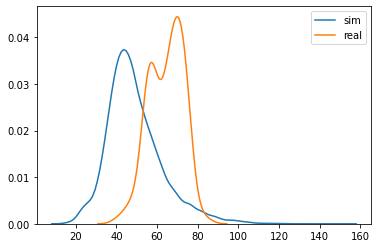

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

print('回流量')
a = train.loc[:,train.columns.str.contains('Reflux')]
b = real_df['回流量']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

In [16]:
train.loc[:,train.columns.str.contains('Naphtha Feed')]

,Naphtha Properties_Naphtha Feed Rate_ton/hr,Naphtha Properties_Naphtha Feed Rate_m3/hr,Naphtha Properties_Naphtha Feed Rate_ton/hr.1
001-01,86.475102,118.000084,86.475102
001-02,86.475047,118.000000,86.475047
001-03,86.475047,118.000000,86.475047
001-04,86.475047,118.000000,86.475047
001-05,86.475102,118.000084,86.475102
...,...,...,...
500-29,103.091852,125.000008,103.091852
500-30,103.091852,125.000008,103.091852
500-31,84.947680,102.999992,84.947680
500-32,84.947680,102.999992,84.947680


進料量


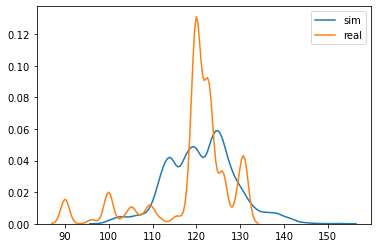

In [17]:
print('進料量')
a = train.loc[:,train.columns.str.contains('Naphtha Properties_Naphtha Feed Rate_m3/hr')]
b = real_df['進料量']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

In [18]:
train.loc[:,train.columns.str.contains('Light End Product Properties_Light End Prod. Rate_m3/hr')]

,Light End Product Properties_Light End Prod. Rate_m3/hr
001-01,7.997900
001-02,8.445992
001-03,9.143384
001-04,7.284074
001-05,7.697134
...,...
500-29,5.317583
500-30,5.310039
500-31,4.388040
500-32,4.384949


輕質流量


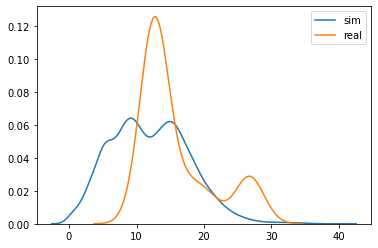

In [19]:
print('輕質流量')
a = train.loc[:,train.columns.str.contains('Light End Product Properties_Light End Prod. Rate_m3/hr')]
b = real_df['輕質流量']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

重質流量


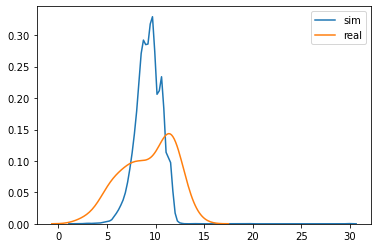

In [20]:
print('重質流量')
a = train.loc[:,train.columns.str.contains('Heavy End Product Properties_Heavy End Product Rate_m3/hr')]
b = real_df['重質流量']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

In [21]:
train.loc[:,train.columns.str.contains('C011 Tray 15')]

,Column Temp Profile_C011 Tray 15 Temp_oC
001-01,96.623230
001-02,100.645081
001-03,105.073944
001-04,96.809662
001-05,100.843872
...,...
500-29,95.988739
500-30,96.121674
500-31,95.862671
500-32,95.907593


In [22]:
train.loc[:,train.columns.str.contains('C011 Tray 24')]

,Column Temp Profile_C011 Tray 24 Temp_oC
001-01,124.445435
001-02,125.292236
001-03,126.110291
001-04,124.587341
001-05,125.325867
...,...
500-29,127.986542
500-30,126.390930
500-31,128.578705
500-32,127.228119


塔頂溫度


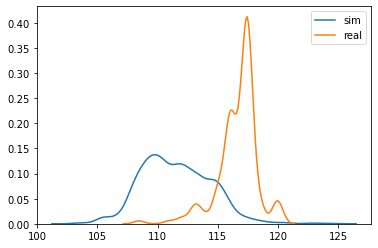

In [23]:
print('塔頂溫度')

a = train.loc[:,train.columns.str.contains('C011 Tray 15')] + train.loc[:,train.columns.str.contains('C011 Tray 24')].values
a = a/2

b = real_df['塔頂溫度']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

塔底溫度


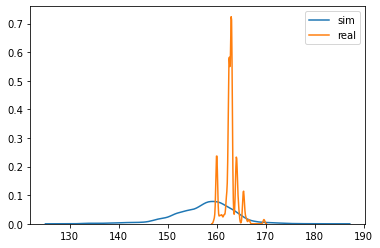

In [24]:
print('塔底溫度')

a = train.loc[:,train.columns.str.contains('C013 Tray 16')] 
b = real_df['塔底溫度']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

加熱爐


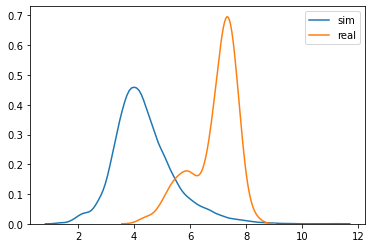

In [25]:
print('加熱爐')
a = train.loc[:,train.columns.str.contains('Duty_Reboiler Heat Duty_Mkcal/hr')] 
b = real_df['加熱爐']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

旁通流量


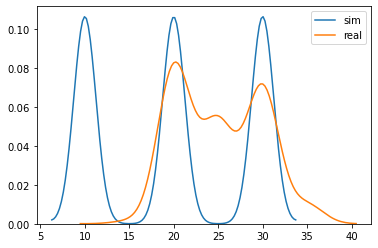

In [26]:
print('旁通流量')
a = train.loc[:,train.columns.str.contains('Case Conditions_Feed Rate to C013')] 
b = real_df['旁通流量']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

核心流量


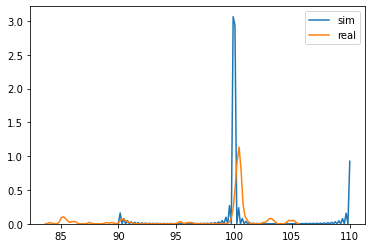

In [27]:
print('核心流量')
a = train.loc[:,train.columns.str.contains('Yield Summary_Heart Cut Prod. Rate_m3/hr')] 
b = real_df['核心流量']
sns.kdeplot(a.values.ravel(),label='sim')
sns.kdeplot(b.values.ravel(),label='real')
plt.show()

In [28]:
real_df.to_csv('../data/phase_2/cleaned/現場數據.csv')